In [66]:
from sklearn.svm import LinearSVC
from pyimagesearch.hog import HOG
from pyimagesearch import dataset
from sklearn.externals import joblib
import cv2
import _pickle as cPickle
import pickle
import numpy as np
import imutils
import mahotas
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [67]:
(digits, target) = dataset.load_digits("./data/digits.csv")


In [68]:
#print(digits[0])
#print(target[0])

In [69]:
hog = HOG(orientations = 18, pixelsPerCell = (10, 10),
	cellsPerBlock = (1, 1), normalize = True)
data = []
# loop over the images
for image in digits:
	# deskew the image, center it
	image = dataset.deskew(image, 20)
	image = dataset.center_extent(image, (20, 20))

	# describe the image and update the data matrix
	hist = hog.describe(image)
	#print(hist.shape)
	data.append(hist)

print(data[0])
# train the model
model = LinearSVC(random_state = 42)
model.fit(data, target)

[0.61966428 0.36823605 0.32598371 0.28057173 0.         0.
 0.         0.20566232 0.         0.07236304 0.         0.
 0.         0.         0.         0.         0.         0.49789437
 0.70569603 0.2869179  0.         0.         0.         0.
 0.         0.         0.         0.27131007 0.29509966 0.
 0.07643416 0.         0.27268715 0.         0.         0.42282091
 0.52384535 0.         0.         0.         0.         0.
 0.         0.         0.         0.05027437 0.         0.14217134
 0.         0.44292385 0.         0.25725323 0.19576306 0.63416212
 0.6298503  0.         0.         0.23365055 0.         0.
 0.11720906 0.         0.21751814 0.26140143 0.         0.25391187
 0.         0.         0.25536606 0.26851996 0.31453694 0.34437398]


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=42, tol=0.0001,
     verbose=0)

In [70]:
#joblib.dump(model, "charocr.pkl", compress=3)
f = open("charocr.cpickle", "wb")
f.write(cPickle.dumps(model))
f.close()

In [71]:
#with open("charocr.cpickle",'rb') as file:
    #model = pickle.loads(file)
model =joblib.load("charocr.cpickle")
model

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=42, tol=0.0001,
     verbose=0)

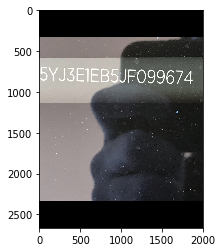

In [85]:

# initialize the HOG descriptor
hog = HOG(orientations = 18, pixelsPerCell = (10, 10),
	cellsPerBlock = (1, 1), normalize = True)

# load the image and convert it to grayscale
#image = cv2.imread('./images/apple_phonenumber.png')
image = cv2.imread('vin17.jpg')
#(h, w) = image.shape[:2]
#center = (w / 2, h / 2)
#M = cv2.getRotationMatrix2D(center, 90, 1.0)
#image = cv2.warpAffine(image, M, (h, w))
#plt.imshow(image)
image =imutils.rotate(image,90)
image = imutils.resize(image,2000)
plt.imshow(image)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# blur the image, find edges, and then find contours along
# the edged regions
blurred = cv2.GaussianBlur(gray, (5, 5), 0)
edged = cv2.Canny(blurred, 30, 150)
cnts = cv2.findContours(edged.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# sort the contours by their x-axis position, ensuring
# that we read the numbers from left to right
#print(cnts[1])
#cnts = sorted([(c, cv2.boundingRect(c)[0]) for c in cnts[1]], key = lambda x: x[1])
cnts = [(c, cv2.boundingRect(c)[0]) for c in cnts[1]]

I think that number is: 4
I think that number is: 7
I think that number is: 4
I think that number is: 7
I think that number is: 1
I think that number is: 0
I think that number is: 4
I think that number is: 5
I think that number is: 0
I think that number is: 1
I think that number is: 4
I think that number is: 0
I think that number is: 7
I think that number is: 8
I think that number is: 4
I think that number is: 4
I think that number is: 0
I think that number is: 1
I think that number is: 1
I think that number is: 5
I think that number is: 1
I think that number is: 1
I think that number is: 1
I think that number is: 1
I think that number is: 4
I think that number is: 1
I think that number is: 1
I think that number is: 8
I think that number is: 1
I think that number is: 4
I think that number is: 1
I think that number is: 5


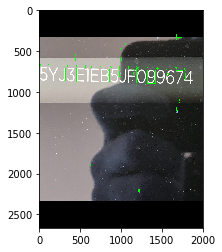

In [86]:
for (c, _) in cnts:
    # compute the bounding box for the rectangle
    (x, y, w, h) = cv2.boundingRect(c)
    if w >= 7 and h >= 20:
        roi=gray[y:y+h,x:x+w]
        thresh = roi.copy()
        T = mahotas.thresholding.otsu(roi)
        thresh[thresh > T] = 255
        thresh = cv2.bitwise_not(thresh)
        thresh = dataset.deskew(thresh, 20)
        thresh = dataset.center_extent(thresh, (20, 20))
        #plt.imshow(thresh)
        hist = hog.describe(thresh)
        #print(hist)
        digit = model.predict([hist])[0]
        print("I think that number is: %d" % (digit))
        cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 1)
        cv2.putText(image, str(digit), (x - 10, y - 10),
            cv2.FONT_HERSHEY_SIMPLEX, 1.2, (0, 255, 0), 5)
        plt.imshow(image)